In [32]:
import seaborn as sns

In [33]:
data = sns.load_dataset('iris')

In [34]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
# data.shape

In [37]:
# data.nunique()
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
# data['species'].describe()
# data.groupby('species').count()
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [39]:
import matplotlib.pyplot as plt

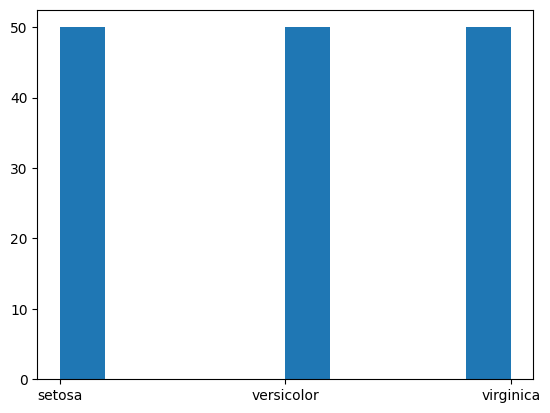

In [40]:
plt.hist(data['species'])
plt.show();

In [41]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


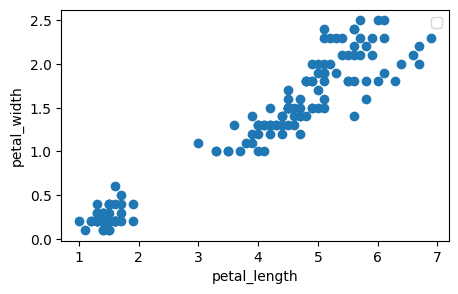

In [42]:
plt.figure(figsize=(5, 3))

plt.scatter(data['petal_length'], data['petal_width']);
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()


<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

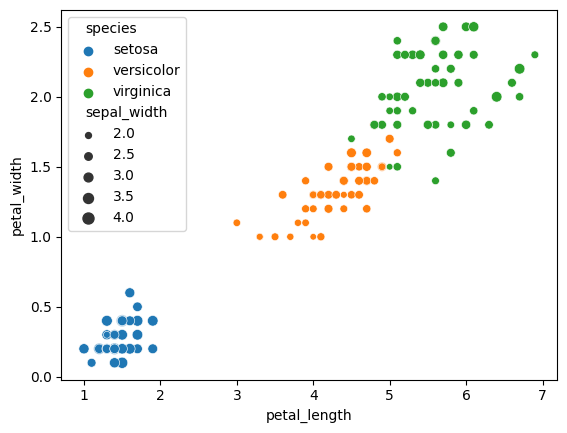

In [43]:
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species', size='sepal_width')

In [44]:
import plotly.express as px
import numpy as np

In [45]:
data['sepal_width_exp'] = np.exp(data['sepal_width'])

In [60]:
# Sans exponentiel dans la size, on obtient un graphique 3D plus confus à analyser.
fig = px.scatter_3d(data, x='petal_length', y='petal_width', z='sepal_length',
              color='species', size='sepal_width', size_max=18,
              opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [61]:
fig = px.scatter_3d(data, x='petal_length', y='petal_width', z='sepal_length',
              color='species', size='sepal_width_exp', size_max=18,
              opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

Au vue du rendue du scatter 3D on va partir sur une étude de type catégorielle.

In [48]:
y = data.species
X = data[['petal_width', 'petal_length', 'sepal_width_exp']]

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaling = MinMaxScaler() #instantiation de la classe de preprocessing pour lancer la démarche de fitting et scaling du model.
scale_fit = scaling.fit(X_train, y_train) # entraînement du model sur les features d’entraînement (toujours).
X_train_scaled = scale_fit.transform(X_train) # mise à l'échelle des features (données présentes en X dans le dataset d'étude)

In [53]:
# Choix du preprocessing de standardscaler si on sait que les résultats du model auront une tendance de type gaussienne.
# sinon partir sur minmaxscaler si on tâtonne.

# Attention, si valeurs aberrantes, se renseigner sur les types de preprocessing à adopter en fonction des résultats d'étude souhaité.
# voir doc : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

# from sklearn.preprocessing import StandardScaler

In [54]:
# scaling = StandardScaler()
# scale_fit = scaling.fit(X_train, y_train)
# X_train_scaled = scale_fit.transform(X_train)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()
# On établie que l'on va utiliser l'équation de type logistic regression car on cherche a obtenir une prediction sur une donnée catégorielle.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

model.fit(X_train_scaled, y_train) # On établie l’entraînement du model soit la détermination des coefficients (a, b, etc) et autres.
# Attention, on doit scaler le X_test afin d'avoir la même échelle que la X_train pour pouvoir faire un scoring.

LogisticRegression()

In [57]:
# Ici on scale le X_test pour mettre à l'échelle les données afin de faire le scoring
X_test_scaled = scale_fit.transform(X_test)
model.score(X_test_scaled, y_test) 
# Le score corresponds dans le cas de notre model à la précision des résultats que l'on pourra obtenir lors des différentes études
# que l'on pourrait effectuer.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

0.9333333333333333

In [58]:
# Dans notre futur API, l'utilisateur va renseigner des valeurs qui seront comprises dans le y_predict.
y_predict = model.predict(X_test_scaled)
# On test notre model avec une prédiction basé sur les X_test_scaled (toujours des données mise à l'échelle).

Test de notre model

In [62]:
user = pd.DataFrame({'petal_width': [0.8], 'petal_length':[2.5], 'sepal_width_exp': [np.exp(3)]})

In [63]:
user

,petal_width,petal_length,sepal_width_exp
0,0.8,2.5,20.085537


In [65]:
user_scaled = scale_fit.transform(user)

In [72]:
model.predict(user_scaled) # Nous indique la catégorie identifiée par le model.
model.predict_proba(user_scaled) 
# nous indique le taux pour chaque catégorie la probabilité d'identifier la bonne catégorie.

array([[0.53742985, 0.37663327, 0.08593688]])

Suite de l'étude

In [69]:
# Calcul de l'écart entre les erreurs soit entre y_predict et y_test (homoscédasticité, hétéroscédasticité)

# Donnée de type catégorielle donc typé str car nous sommes dans un résultat attendu de type catégorielle:
# !!! res = y_predict - y_test


<class 'numpy.ndarray'>


Cross validation :

In [75]:
from sklearn.model_selection import cross_validate

In [80]:
cross_validate(model, X_train, y_train, cv=5)

/home/mathieu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'fit_time': array([0.05463552, 0.04946423, 0.0446949 , 0.04689002, 0.04896283]),
 'score_time': array([0.00482345, 0.00644422, 0.00693941, 0.00696898, 0.00531864]),
 'test_score': array([0.95238095, 1.        , 0.95238095, 0.95238095, 0.9047619 ])}